In [1]:
import sys
import numpy as np
from qiskit.converters import circuit_to_dag, dag_to_circuit
import supremacy_generator as suprem_gen
import auto_cut_finder as cut_finder
import cutter
from qiskit.tools.visualization import dag_drawer
import timeit
import matplotlib.pyplot as plt

dimensions = range(2,9)
num_qubits = [np.power(x,2) for x in dimensions]
fixed_depth_times = np.zeros(len(dimensions))

for idx, i in enumerate(dimensions):
    circ = suprem_gen.circuit_generator([i,i,8], random_order = True)
    searcher_start = timeit.default_timer()
    pareto_K_d = cut_finder.find_pareto_solutions(circ=circ, num_clusters=2)
    searcher_end = timeit.default_timer()
    fixed_depth_times[idx] = searcher_end-searcher_start
    for pareto_key in pareto_K_d:
        pareto_K, pareto_d = pareto_key
        pareto_cuts, pareto_grouping = pareto_K_d[pareto_key]
        fragments, complete_path_map, K, d = cutter.cut_circuit(circ, pareto_cuts)
        if K!= pareto_K or d != pareto_d:
            raise Exception('pareto predicted {}, cutter returned {}'.format(pareto_key, (K,d)))

depth = range(8,24)
fixed_qubits_times = np.zeros(len(depth))
for idx, d in enumerate(depth):
    circ = suprem_gen.circuit_generator([4,4,d], random_order = True)
    searcher_start = timeit.default_timer()
    pareto_K_d = cut_finder.find_pareto_solutions(circ=circ, num_clusters=2)
    searcher_end = timeit.default_timer()
    fixed_qubits_times[idx] = searcher_end-searcher_start
    for pareto_key in pareto_K_d:
        pareto_K, pareto_d = pareto_key
        pareto_cuts, pareto_grouping = pareto_K_d[pareto_key]
        fragments, complete_path_map, K, d = cutter.cut_circuit(circ, pareto_cuts)
        if K!= pareto_K or d != pareto_d:
            raise Exception('pareto predicted {}, cutter returned {}'.format(pareto_key, (K,d)))
            
            
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(num_qubits, fixed_depth_times)
plt.xlabel('#qubits')
plt.ylabel('running time (s)')
plt.title('Google supremacy crcuits with depth=8')
plt.subplot(122)
plt.plot(depth, fixed_qubits_times)
plt.xlabel('depth')
plt.title('#qubits = 4*4')
plt.show()

will run 8 times
will run 164 times
will run 877 times
will run 2877 times
will run 7246 times
will run 15445 times
will run 29330 times
will run 877 times
will run 1058 times
will run 1479 times
will run 1978 times
will run 2257 times
will run 2877 times
will run 3218 times
will run 3579 times
will run 4366 times
will run 5239 times
will run 5708 times
will run 6711 times
will run 7246 times
will run 7804 times
will run 8986 times
will run 9612 times


<Figure size 1000x1000 with 2 Axes>

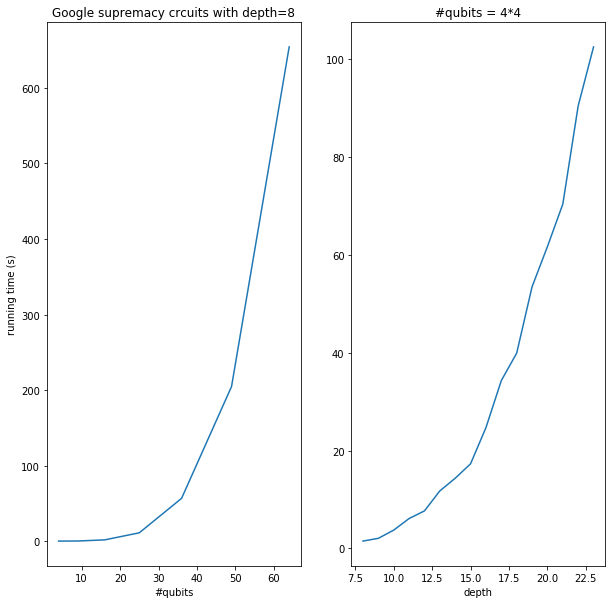

In [2]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(num_qubits, fixed_depth_times)
plt.xlabel('#qubits')
plt.ylabel('running time (s)')
plt.title('Google supremacy crcuits with depth=8')
plt.subplot(122)
plt.plot(depth, fixed_qubits_times)
plt.xlabel('depth')
plt.title('#qubits = 4*4')
plt.show()